# Assignment 2 - Machine Learning

We chose this and did that bla bla bla...
<br>

## Part 1 - Data Preparation

In [189]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [190]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1277769600&period2=1698537600&interval=1d&events=history&includeAdjustedClose=true')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3352,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
3353,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
3354,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
3355,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600


In [191]:
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3357 non-null   object 
 1   Adj Close  3357 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.6+ KB


In [192]:
df = df.rename(columns={'Adj Close': 'Adj_Close'})

In [193]:
# Turn date into values that can be used by the model
from datetime import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.toordinal) # day as integer since 1.1.1
df.sort_values(by=['Date'], inplace=True)

In [194]:
# scaling the dates

min_date = df['Date'].min()
df['Date'] = df['Date'] - min_date

df

,Date,Adj_Close
0,0,1.592667
1,1,1.588667
2,2,1.464000
3,3,1.280000
4,7,1.074000
...,...,...
3352,4864,212.080002
3353,4865,216.520004
3354,4866,212.419998
3355,4867,205.759995


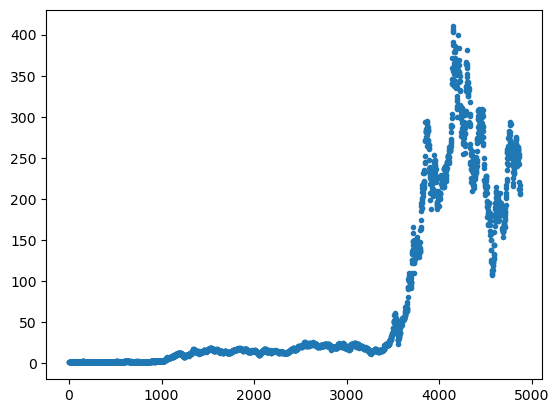

In [195]:
plt.scatter(df.Date, df.Adj_Close, marker='.')

## Part 2 - Split - Training and testing

In [196]:
# Split data into training and testing
X = df.Date.values.reshape(-1, 1)
y = df.Adj_Close.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Part 3 - Polynomial Regression

In [197]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [198]:
# Transform input data
poly = PolynomialFeatures(degree=24)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [199]:
# Create model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [200]:
# Predict
y_pred = model.predict(X_test_poly)

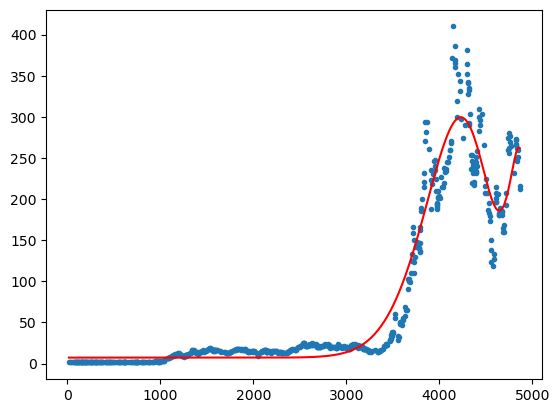

In [201]:
# Plot
sorted_indices = X_test.ravel().argsort()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test, y_test, marker='.')
plt.plot(X_test_sorted, y_pred_sorted, color='red')
plt.show()

# Mean squared error

In [202]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

543.3465720095954


In [203]:
# R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.9461654280321944


# Prediction

In [204]:
# Predict
y_pred = model.predict(X_test_poly)

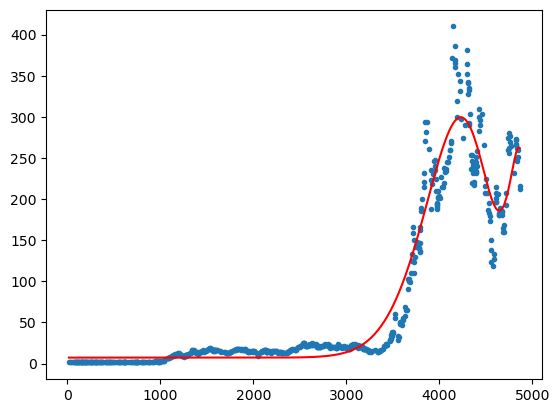

In [205]:
# Plot
sorted_indices = X_test.ravel().argsort()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test, y_test, marker='.')
plt.plot(X_test_sorted, y_pred_sorted, color='red')
plt.show()

In [206]:
# Guess the price on 2021-10-01